# MAT281 - Laboratorio N°03



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
#Separando variables numericas

df_num = df.loc[:,(df.dtypes == float)]
df_num = df_num.fillna(df_num.mean())
df_num["year"] = df["year"]

#normalizar
df_num[df_num.columns] = MinMaxScaler().fit_transform(df_num)
df_num

,desplazamiento,cilindros,co2,consumo_litros_milla,year
0,0.243590,0.142857,0.398014,0.331027,0.000000
1,0.461538,0.285714,0.527672,0.475113,0.000000
2,0.243590,0.142857,0.424351,0.360294,0.029412
3,0.461538,0.285714,0.527672,0.475113,0.029412
4,0.410256,0.285714,0.424351,0.360294,0.088235
...,...,...,...,...,...
36786,0.051282,0.071429,0.173307,0.083878,0.911765
36787,0.038462,0.071429,0.174919,0.090196,0.941176
36788,0.038462,0.071429,0.182174,0.096886,0.941176
36789,0.038462,0.071429,0.176532,0.090196,0.970588


In [4]:
#Separando variables categoricas

df_cat = df.loc[:,df.dtypes==object]
df_cat = pd.get_dummies(df_cat)
df_cat

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


**La transformacion se realzia creando columnas cuyo nombre son las categorias y les asigna el valor 1 si la fila tiene dicha categoria o 0 si no.**

In [5]:
#Juntar dfs
df_procesado = df_num
for col in df_cat.columns:
    df_procesado[col] = df_cat[col]
df_procesado


,desplazamiento,cilindros,co2,consumo_litros_milla,year,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.243590,0.142857,0.398014,0.331027,0.000000,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.461538,0.285714,0.527672,0.475113,0.000000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.243590,0.142857,0.424351,0.360294,0.029412,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.461538,0.285714,0.527672,0.475113,0.029412,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.410256,0.285714,0.424351,0.360294,0.088235,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.051282,0.071429,0.173307,0.083878,0.911765,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.038462,0.071429,0.174919,0.090196,0.941176,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.038462,0.071429,0.182174,0.096886,0.941176,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.038462,0.071429,0.176532,0.090196,0.970588,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

In [6]:
#Ajuste mediante kmeans
X = np.array(df_procesado)
kmeans = KMeans(n_clusters=8,n_init=25, random_state=123)
kmeans.fit(X)

clusters = kmeans.labels_ # clusters

In [94]:
#asociacion
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
df_procesado.head()

,desplazamiento,cilindros,co2,consumo_litros_milla,year,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.243590,0.142857,0.398014,0.331027,0.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
1,0.461538,0.285714,0.527672,0.475113,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
2,0.243590,0.142857,0.424351,0.360294,0.029412,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
3,0.461538,0.285714,0.527672,0.475113,0.029412,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
4,0.410256,0.285714,0.424351,0.360294,0.088235,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,6


In [95]:
#Media y Moda

aux = df.loc[:,(df.dtypes == float)]
dfp_num = df_procesado.loc[:,aux.columns] #selecionando datos numericos
dfp_num["cluster"] = clusters


print("Medias")
display(dfp_num.groupby("cluster").mean())
print("Modas")
display(dfp_num.groupby(by="cluster").agg(pd.Series.mode))

Medias


,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,
0,0.179404,0.150728,0.240178,0.156814
1,0.250778,0.195544,0.304383,0.226563
2,0.333730,0.257964,0.354182,0.281221
3,0.585590,0.430797,0.510289,0.454503
4,0.159576,0.141184,0.242287,0.156504
5,0.562730,0.405562,0.501887,0.442585
6,0.450916,0.327240,0.409956,0.343253
7,0.362121,0.299467,0.354068,0.282213


Modas


,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,
0,0.179487,0.142857,0.275108,0.194444
1,0.179487,0.142857,0.317749,0.241830
2,0.307692,0.285714,0.374603,0.305011
3,0.564103,0.428571,0.454199,0.393464
4,0.179487,0.142857,0.275108,0.194444
5,0.653846,0.428571,0.454199,0.393464
6,0.474359,0.285714,0.424351,0.331027
7,0.307692,0.285714,0.374603,0.281734


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [88]:
#Obteniendo score para cada cantidad de clusters

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,1,361790.240470
1,2,204661.753374
2,3,166522.477999
3,4,145203.429375
4,5,127152.232822


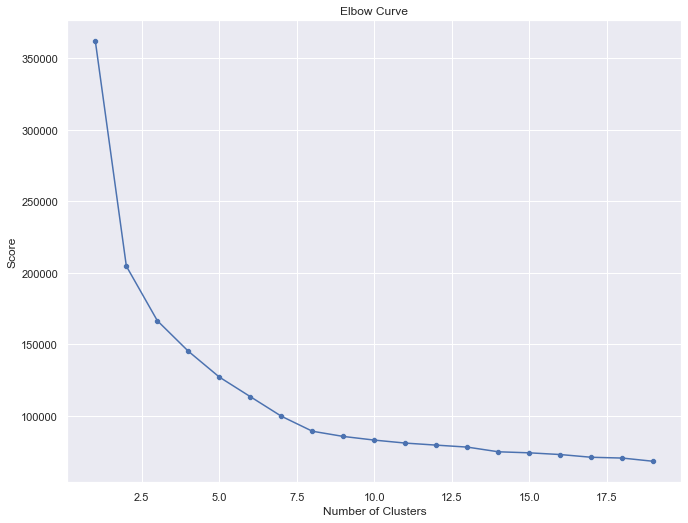

In [89]:
#grafico

fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()


Se puede ver que a partir de 8 clusters, la reducción en la suma total de cuadrados internos disminuye con velocidad casi constante. por lo que 8 clusters es un buen numero

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [96]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [97]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [98]:
#Exploracion inicial
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
species         1.000000
dtype: float64

In [99]:
iris.var()

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
species         0.671141
dtype: float64

In [123]:
#PCA

mod_pca = PCA().fit(iris.drop("species",axis=1))
pca_df = pd.DataFrame(
    data    = mod_pca.components_,
    columns = iris.drop("species",axis=1).columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)
pca_df

,sepal_length,sepal_width,petal_length,petal_width
PC1,0.361387,-0.084523,0.856671,0.358289
PC2,0.656589,0.730161,-0.173373,-0.075481
PC3,-0.582030,0.597911,0.076236,0.545831
PC4,-0.315487,0.319723,0.479839,-0.753657


La primera componente recoge datos mayoritariamente de el largo del petalo.

La segunda, le da mas importancia a los datos de los sepales.

La tercera, relaciona el ancho del sepal con el ancho y el largo del petalo.

La cuarta , toma la mayor cantidad de datos del largo de petalos y el ancho del sepal dandole muy poco peso a el ancho del petalo.

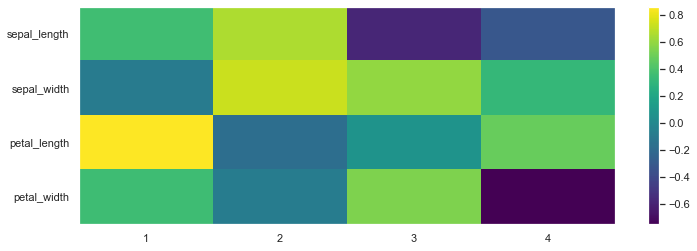

In [125]:
#heatmap

plt.figure(figsize=(12,4))
componentes = mod_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.drop("species",axis=1).columns)), iris.drop("species",axis=1).columns)
plt.xticks(range(len(iris.drop("species",axis=1).columns)), np.arange(mod_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

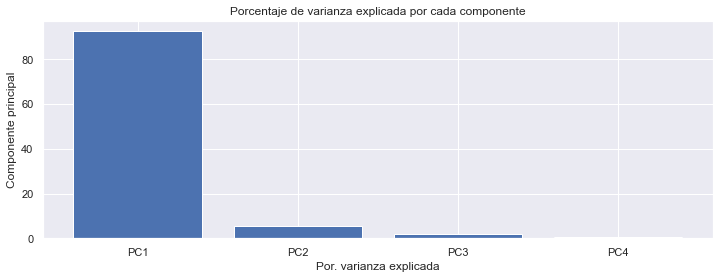

In [127]:
#varianza por componente

percent_variance = np.round(mod_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(mod_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

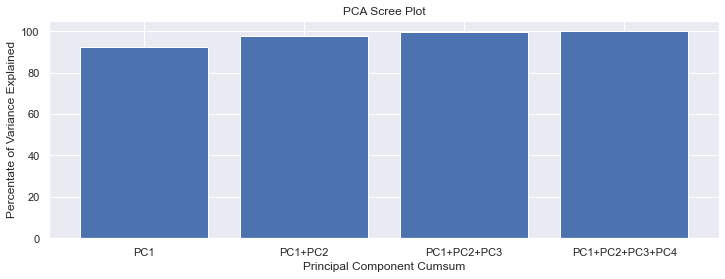

In [128]:
#varianza por la suma acumulada de los componente

percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

La primera componente explica mas del 90% de la varianza

In [137]:
#proyeccion

proyecciones = PCA().fit(X=iris.drop("species",axis=1)).transform(X=iris.drop("species",axis=1))
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = iris.index
)
proyecciones_df.head()

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [143]:
#grafico PCA

X = iris.drop(columns='species')
y = iris['species']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['label'] = y

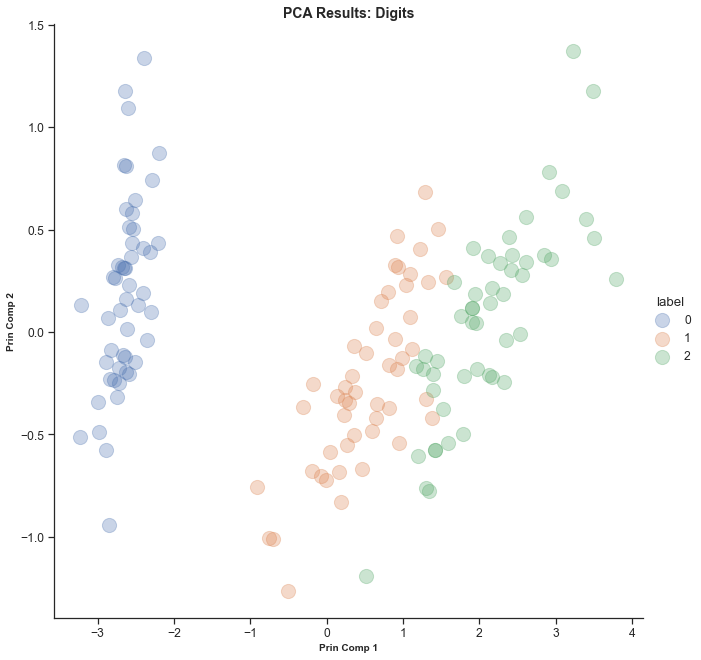

In [144]:
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [140]:
#grafico tSNE

X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['label'] = y


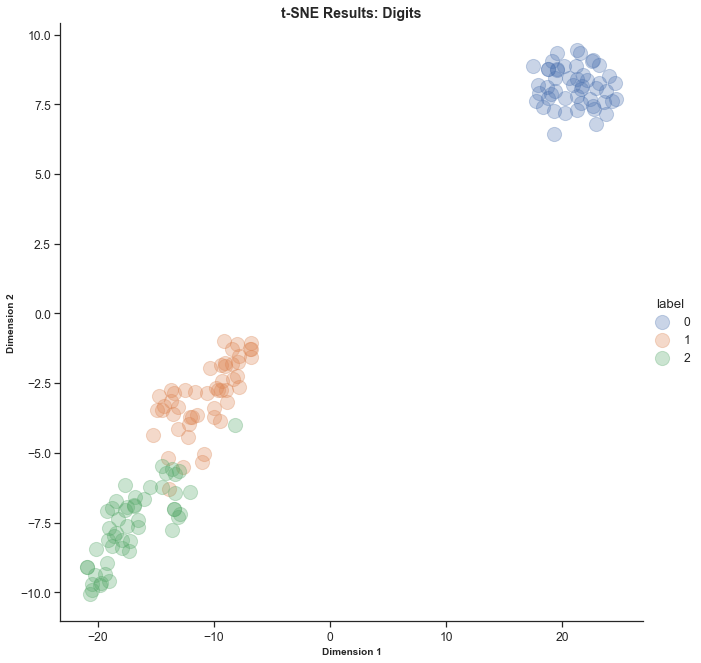

In [141]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

En este caso como el metodo PCA grafica una sola componente se puede ver que la separacion de datos es similar. Sin embargo el metodo tSNE deja mas claro que hay poca diferencia entre la especie 2 y la 3